# Desafio Brasileirão Dataset

Você deverá gerar algumas informações sobre um dataset com informações do campeonato brasileiro de 2003 até 2022. O dataset poderá ser baixado [aqui](https://github.com/HenriqueWF/Serie_A_Campeonato_Brasileiro/blob/main/campeonato-brasileiro-full.csv). Não esqueça de salvar o arquivo no formato '.csv'. Você deverá responder a lista de perguntas abaixo:

In [ ]:
# Imports e criação do objeto dataframe
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados aqui
df_brasileirao = pd.DataFrame(pd.read_csv("campeonato-brasileiro-full.csv"))
df_brasileirao.head()

In [61]:
# Parte 1 - Exploração Inicial

# 1. Quantas linhas e colunas o dataset possui?
print(f"Linhas: {df_brasileirao.shape[0]} e Colunas: {df_brasileirao.shape[1]}.")

# 2. Quais são as colunas do dataset?
display(df_brasileirao.info())

# 3. Há valores nulos? Quantos em cada coluna?
display(df_brasileirao.isna().sum())

# 4. Liste os tipos de dados de cada coluna.
display(df_brasileirao.dtypes)

# 5. Converta a coluna de data (se existente) para datatime e confirme a alteração.
df_brasileirao['data'] = pd.to_datetime(df_brasileirao['data'], dayfirst=True)
display(df_brasileirao.dtypes)
df_brasileirao.head()

Linhas: 8025 e Colunas: 17.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  8025 non-null   int64         
 1   rodata              8025 non-null   int64         
 2   data                8025 non-null   datetime64[ns]
 3   hora                8025 non-null   object        
 4   mandante            8025 non-null   object        
 5   visitante           8025 non-null   object        
 6   formacao_mandante   3051 non-null   object        
 7   formacao_visitante  3051 non-null   object        
 8   tecnico_mandante    3415 non-null   object        
 9   tecnico_visitante   3415 non-null   object        
 10  vencedor            8025 non-null   object        
 11  arena               8025 non-null   object        
 12  mandante_Placar     8025 non-null   int64         
 13  visitante_Placar    

None

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
gols_no_jogo             0
dtype: int64

ID                             int64
rodata                         int64
data                  datetime64[ns]
hora                          object
mandante                      object
visitante                     object
formacao_mandante             object
formacao_visitante            object
tecnico_mandante              object
tecnico_visitante             object
vencedor                      object
arena                         object
mandante_Placar                int64
visitante_Placar               int64
mandante_Estado               object
visitante_Estado              object
gols_no_jogo                   int64
dtype: object

ID                             int64
rodata                         int64
data                  datetime64[ns]
hora                          object
mandante                      object
visitante                     object
formacao_mandante             object
formacao_visitante            object
tecnico_mandante              object
tecnico_visitante             object
vencedor                      object
arena                         object
mandante_Placar                int64
visitante_Placar               int64
mandante_Estado               object
visitante_Estado              object
gols_no_jogo                   int64
dtype: object

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,gols_no_jogo
0,1,1,2003-03-29,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ,6
1,2,1,2003-03-29,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS,2
2,3,1,2003-03-30,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,2
3,4,1,2003-03-30,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA,4
4,5,1,2003-03-30,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP,2


In [ ]:
# Parte 2 - Filtragem e Agrupamento

# 1. Quantos jogos terminaram empatados?
# filtrar mandante_Placar = visitante_Placar
# fazer a contagem
print(f"Jogos empatados: {df_brasileirao[df_brasileirao['mandante_Placar'] == df_brasileirao['visitante_Placar']].shape[0]}.")

# 2. Qual foi a média de gols por jogo?
# criar uma coluna somando os gols do mandante e do visitante e depois fazer a média.
df_brasileirao['gols_no_jogo'] = df_brasileirao['mandante_Placar'] + df_brasileirao['visitante_Placar']
print(f"Média de gols por jogo: {df_brasileirao['gols_no_jogo'].mean().round(2)}.")

# 3. Crie uma tabela mostrando quantas vezes cada time jogou como mandante.
print("\nTabela de quantidade de jogos como mandante:")
display(df_brasileirao.groupby('mandante')['mandante'].count())

# 4. Qual clube mais venceu como mandante?
print("Time mais venceu como mandante:")
# df_mandante_venceu = df_brasileirao[df_brasileirao['mandante_Placar'] > df_brasileirao['visitante_Placar']]
# df_mandante_venceu['qtde'] = 1
# df_mv_agrupado = df_mandante_venceu.groupby('vencedor')['qtde'].sum()
# df_mv_agrupado.sort_values()
# df_mv_agrupado

# 5. Quantas partidas tiveram 3 ou mais gols no total?
print(f"Jogos com 3 gols ou mais: {df_brasileirao[df_brasileirao['gols_no_jogo'] > 2].shape[0]}.")

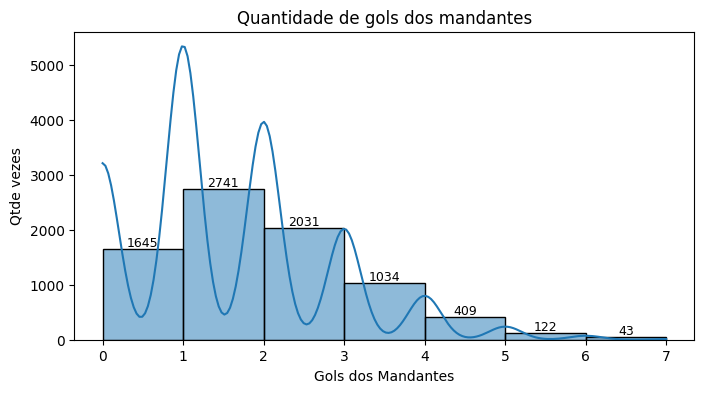

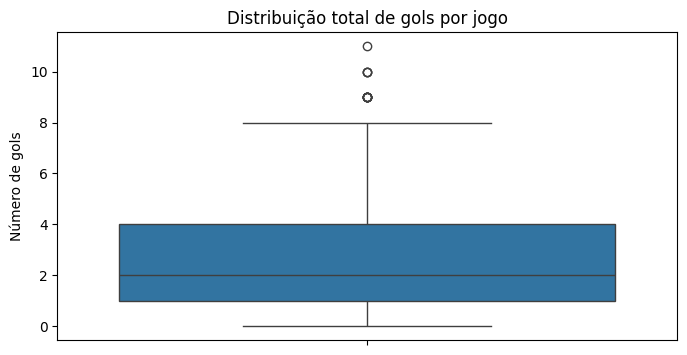

In [65]:
# Parte 3 - Visualização

# 1. Gráfico de barras: Mostre a quantidade de vitórias dos mandantes vs visitantes:

# plt.figure(figsize=(8,4))
# df_brasileirao['quem_venceu'] = if df_brasileirao['mandante_Placar'] > df_brasileirao['visitante_Placar'] 



# 2. Gere um Histograma da quantidade de gols dos mandantes:

plt.figure(figsize=(8,4))

ax = sns.histplot(df_brasileirao['mandante_Placar'], bins=7, kde=True)
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, int(height), ha="center", va="bottom", fontsize=9)

plt.title("Quantidade de gols dos mandantes")
plt.xlabel("Gols dos Mandantes")
plt.ylabel("Qtde vezes")
plt.show()


# 3. Gere um boxplot da distribuição total de gols por jogo:

plt.figure(figsize=(8,4))

sns.boxplot(data=df_brasileirao, y='gols_no_jogo')
plt.title("Distribuição total de gols por jogo")
plt.ylabel("Número de gols")
plt.show()
